# EK121 Final Project, Fall 2023

*Title:*

Social Security Disability Requests Vary by Northern vs. Southern States in the USA

*Submitted Date:*

Oct. 16, 2023

-------------


*My name and Boston University email address*, as a tuple:

In [35]:
myname = ("Andrew Sabelhaus", "asabelha@bu.edu")

*My teammates' names and Boston University email addresses, as tuples:*

In [36]:
teammate1 = ("Jeffrey Carruthers", "jbc@bu.edu")

In [37]:
teammate2 = ("Jacob Norman", "jfnorman@bu.edu")

In [38]:
teammate3 = ()

-------------

*Summary:*

Something about Social Security Disability and why it's important. Some dataset could answer an important question for us. We used data this-or-that. Our analysis...

--insert-your-project-here--

Setup:

In [39]:
import numpy as np #numpy maybe not needed
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
# rcParams from https://matplotlib.org/stable/users/explain/customizing.html

In [121]:
data_url = "https://www.dropbox.com/s/ie1zvkr7iht2i1j/public_workingtimedata.dta?dl=1" # store data url here

df = pd.read_stata(data_url) # data is a stata file, so use read_stata to get dataframe set up
#df.to_csv('./csv.csv') # test used so we can look at raw data and as CSV instead of .dta/stata
#no real cleaning required, very nice data set. Some NaN values that will be discussed later, but largely not impactful.

### Global Labor Trends

We hypothesize that, globally, there has been a shift to lower labor hours.

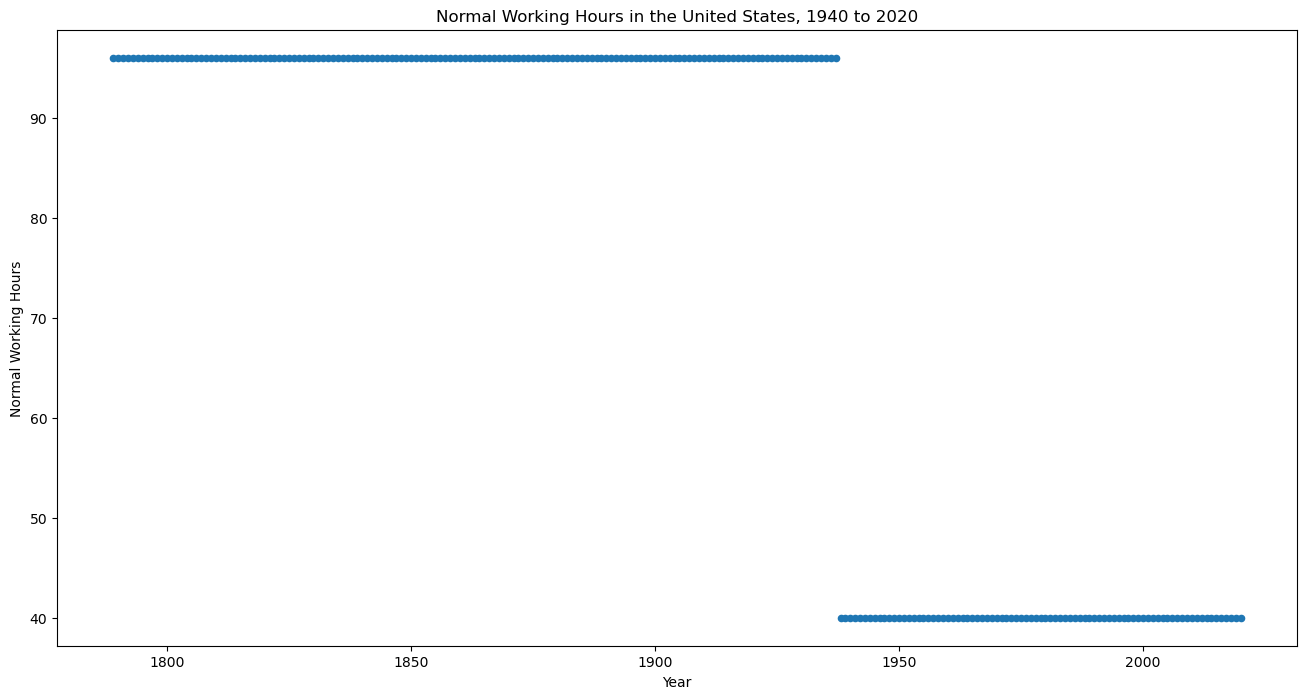

In [125]:
# Plot 1.1

df_by_year = df.sort_values(["year"]) # sort everything by year
df_US = df.loc[df['country_name'] == "United States of America"] # get only the USA labor hours data

df_US_hours = df_US[["country_name", "year", "normalhours"]] # only get these columns 
df_US_hours.plot.scatter(x="year", y="normalhours") # plot the year vs. normal working hours

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Normal Working Hours in the United States, 1940 to 2020')

plt.show()

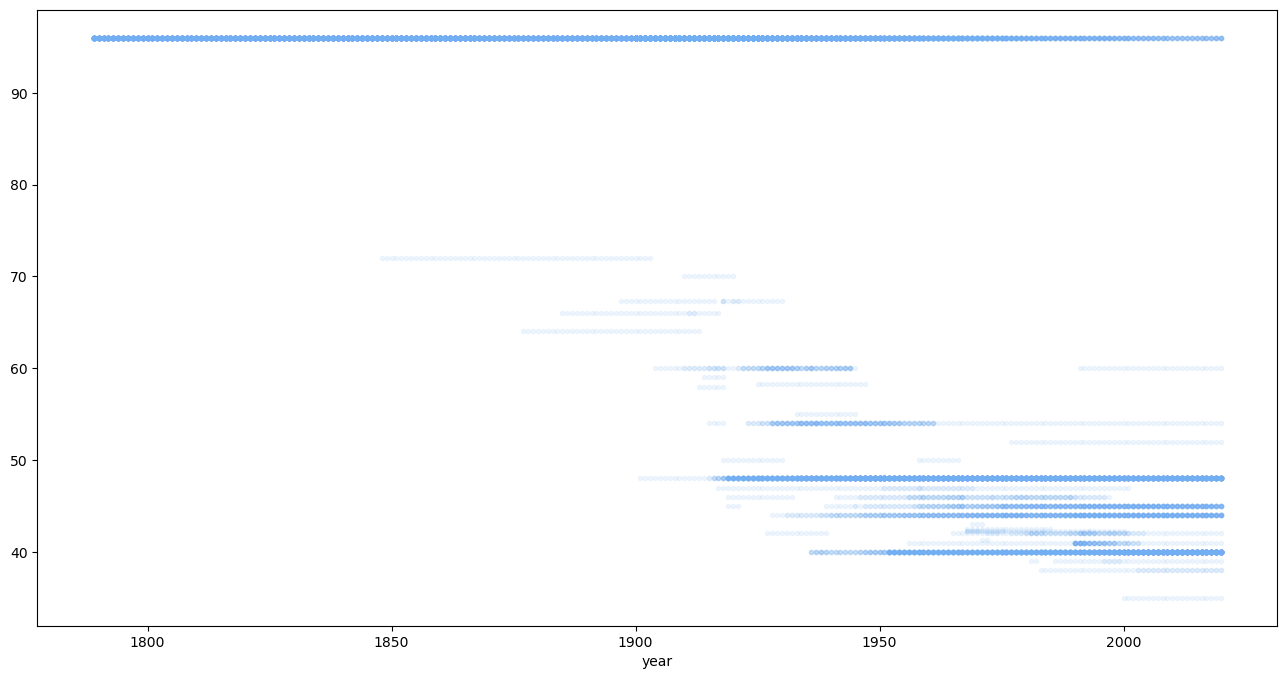

In [126]:
# Plot 1.2
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='normalhours').plot(legend=None, alpha=0.1, linestyle='None', marker='.', color="#72aef2") # https://www.statology.org/pandas-groupby-plot/
plt.show()

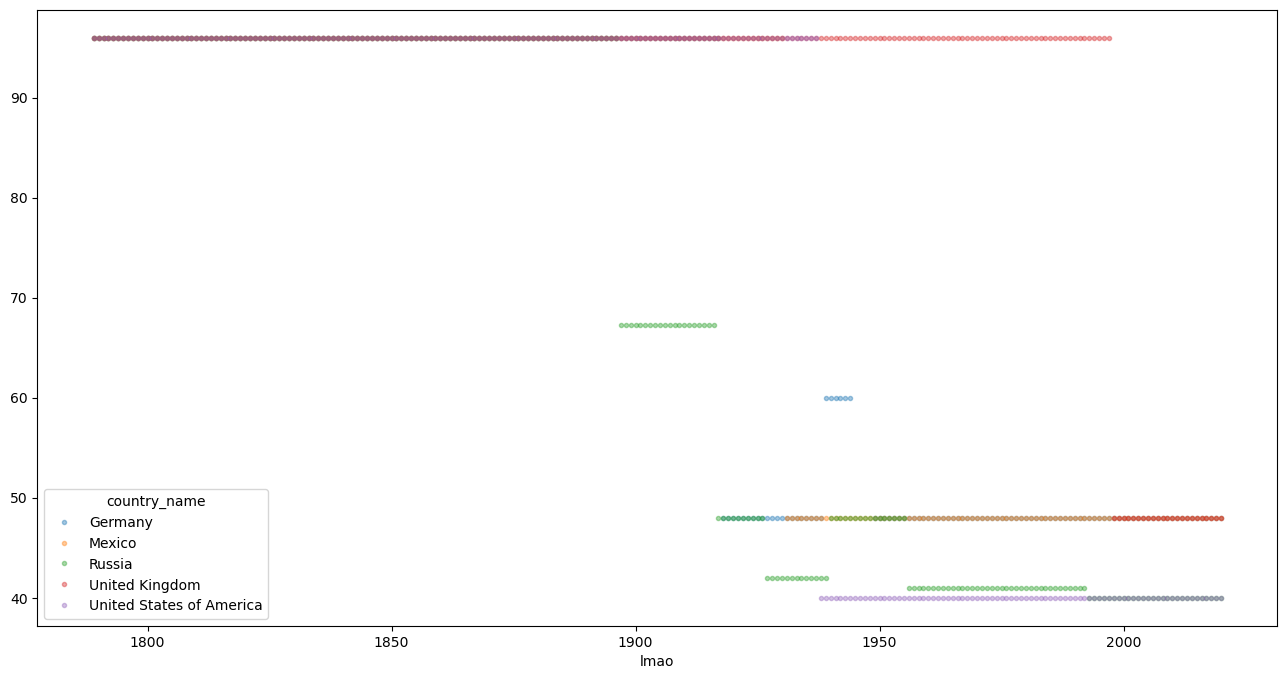

In [127]:
# Plot 1.3
#look at fewer countries here to illustrate a sort of trend more simply (like 4-6 countries)

df_select = df.loc[df['country_name'].isin(['United States of America', 'Mexico', 'Russia', 'Germany', 'United Kingdom'])]
#df_select = df.loc[df['country_name'].isin(['United Kingdom'])]

pd.pivot_table(df_select.reset_index(), index='year', columns='country_name', values='normalhours').plot(alpha=0.4, linestyle='None', marker='.')
plt.xlabel('lmao')
plt.show()

### Hypothesis 2: Overtime hours and Work Culture

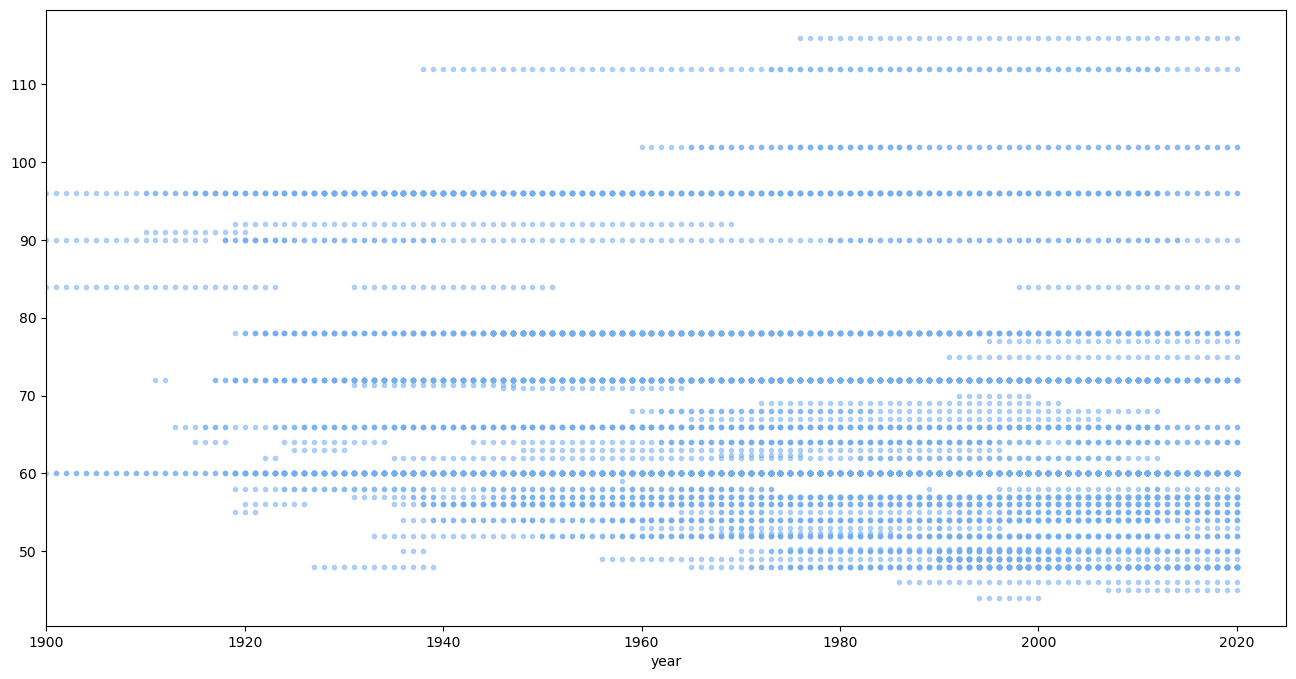

In [54]:
# Plot 2.1

df.plot(x='year',y='hours_max', legend=None, alpha=0.5, linestyle='None', marker='.', color="#72aef2") # scatter of year vs. max hours

plt.xlim(1900, 2025) # cut out values pre-1900, dataset limited in scope at this point

plt.show()

discuss trend

However, if we inspect the dataframe we can see that 'hours_max' has many NaN (missing) values. This could easily make this data less accurate, so let's inspect how many NaN items are in this column using the code below.

In [118]:
df_hours_max_and_country = df[['country_name', 'hours_max']]
count_NaN_max_hours = 0

NaN_dict = {}
NaN_list = []

#make a dictionary of format 'country':(number of nan items)
for index, row in df_hours_max_and_country.iterrows(): #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows 
    if(row['hours_max'] != row['hours_max']): #check if max_hours is NaN by checking if equal to self
        count_NaN_max_hours+=1
        if(not row['country_name'] in NaN_dict.keys()):
            NaN_dict[row['country_name']] = 1
        else:
            NaN_dict[row['country_name']] += 1

for key in NaN_dict:
    NaN_list.append([key, NaN_dict[key]])

df_NaN_max_hours = pd.DataFrame(NaN_list, columns=['Country', 'NaN Max Hours']).sort_values(by='NaN Max Hours').set_index(['Country'])


print(f"There are {count_NaN_max_hours} NaN items in the 'hours_max' column! That's a lot!")
#df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 100].plot.hist()
#plt.show()



There are 15785 NaN items in the 'hours_max' column! That's a lot!


With so many NaN values, it's clear that any trend we see in the plot above does not reflect a completely global trend, at least at some points in time.

We can plot some of this data to check what countries have these NaN values and investigate why, though it's a bit of an uglier bar graph.

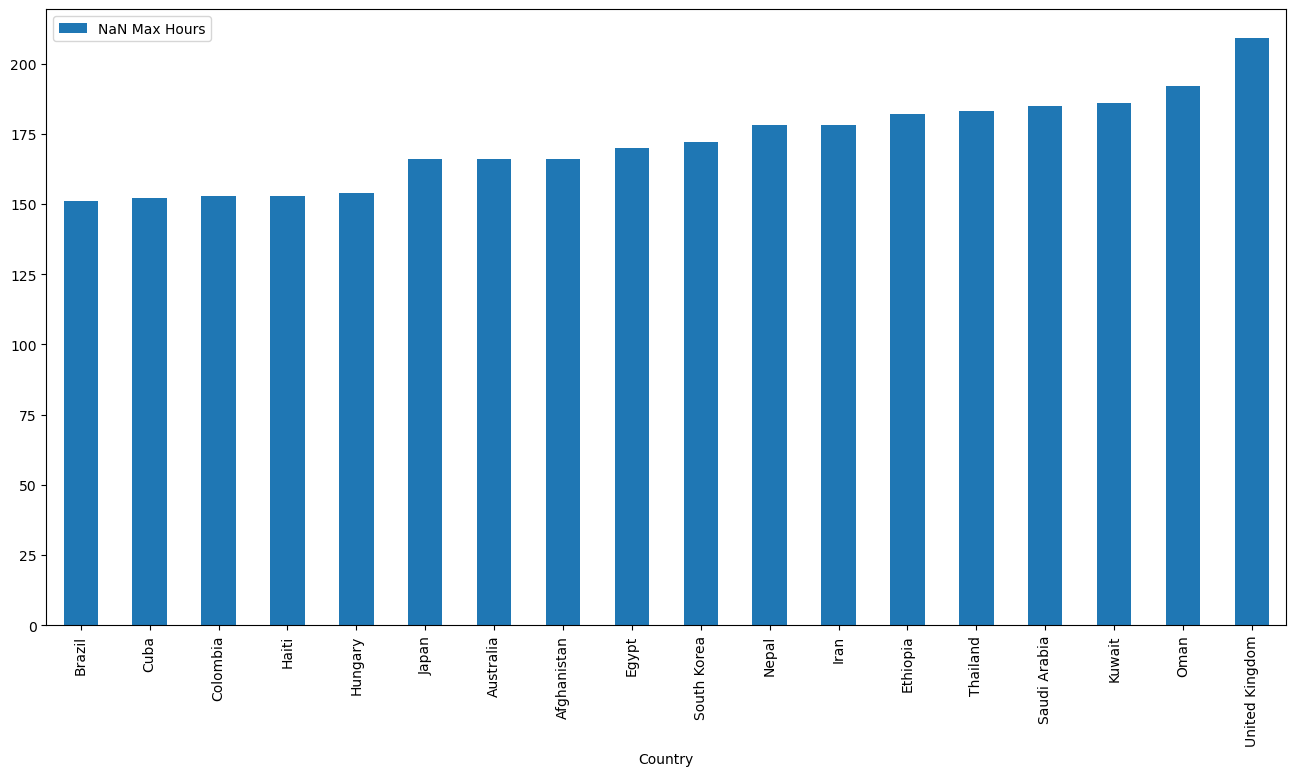

In [119]:
df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 150].plot.bar()
plt.show()

Picking some countries from this bar graph, we can see that there are various reasons for this missing data:


In [ ]:

df_JP = df.loc[df['country_name'] == "Japan"]
df_JP_hours = df_JP[["country_name", "year", "hours_max"]]
print(df_JP_hours)

df_2020 = df.loc[df["year"] == 2020]
df_2020.plot.scatter(x="normalhours", y="hours_max")